In [1]:
import numpy as np
import cmath as cm

dx = .005
dt = .05

n = 1000
x = np.linspace(0,n*dx,n)
psi0 = np.zeros(n,dtype=complex)
psi1 = np.zeros(n,dtype=complex)
u = np.zeros(n)
"""
for i in range(10):
    u[i] = 10000000*(10-i)
    u[n-i-1] = 10000000*(10-i)
"""
#u = np.square(x)/n

#u[1]=u[0] = -1000
#u[n-2]=u[n-1]= -1000


def timestep():
    global psi0,psi1
    for k in range(0,n):
        psi1[k]=psi0[k]
    
    for i in range(0,20):
        for k in range(0,n):
            denom = u[k] - 1j/dt - 2/(dx**2)
            numer = -(psi1[(k+1)%n]+psi1[(k-1)%n])/(dx**2) + 1j*psi0[k]/dt
            psi1[k] = numer/denom
    
    
    #normalize
    integral = 0
    for k in range(0,n):
        integral+=np.abs(psi1[k])**2
    integral*=dx
    psi1/=np.sqrt(integral)
    


In [2]:
psi0 = np.sin(x*2*3.1415/(n*dx))+1j*np.cos(x*4*3.1415/(n*dx))

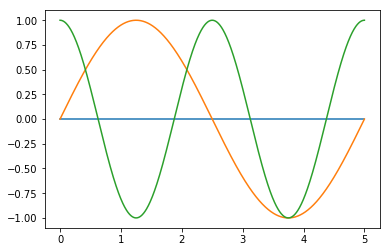

In [3]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(x,u)
plt.plot(x,np.real(psi0),x,np.imag(psi0))
plt.show()

In [4]:
from IPython.display import HTML
import matplotlib.animation as animation

plt.clf()
fig, ax = plt.subplots(1,1,figsize=(12,4))
real_part, = ax.plot(x,np.real(psi0))
imag_part, = ax.plot(x,np.imag(psi0))

def update(n):
    if(n>1):
        global psi0, psi1
        timestep()
        real_part.set_data(x,np.real(psi0))
        imag_part.set_data(x,np.imag(psi0))
        psi0, psi1 = psi1, psi0
        return fig
    
anim = animation.FuncAnimation(fig, update,frames=2000, interval=50, blit=False)
video = anim.to_html5_video()
HTML(video)

KeyError: 'ffmpeg'